In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from preprocessing import PreProcessor

In [2]:
data_processor = PreProcessor('/Users/lukeheirene/ADCC-Project/Receptor_level_model/Goldilocks_classifier/synthetic_synapse_fc_outputs.csv')

data = data_processor.get_data()
data1 = data[1]
data2 = data[2]
data = data[0]

data = shuffle(data)
data.head()

10240


,arrays,label
21827,"[0.151931560039578, 0.151931560039578, 0.33754...",1
5054,"[6.353299921021016e-07, 4.456234851441051e-05,...",0
29186,"[0.18417895627480718, 0.18417895627480782, 0.1...",1
20015,"[1.4934907796443368e-07, 1.013492569303127e-05...",0
21259,"[0.12429505017504008, 0.7315697359782698, 0.90...",1


In [3]:
print(data1.shape)
print(data2.shape)
print(data.shape)

(8, 10240)
(8, 20480)
(30720, 2)


In [4]:
x1 = data.drop('label', axis=1)
y = np.ravel(data['label'])
y = y.astype(int)
x = np.zeros((x1.shape[0], 8))

for i in range(x.shape[0]):
    data_array = x1.values[i][0]
    for j in range(x.shape[1]):
        x[i][j] = data_array[j]

In [5]:
print(x.shape)

(30720, 8)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=50)

In [7]:
print(type(x_train[0]))

<class 'numpy.ndarray'>


In [8]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
y_predict = random_forest_model.predict(x_test)
y_predict1 = svc_model.predict(x_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))

In [11]:
confusion = pd.DataFrame(cm, index = ['No Goldilocks', 'Goldilocks'], columns=['Predicted no goldilocks', 'Predicted Goldilocks'])

<AxesSubplot:>

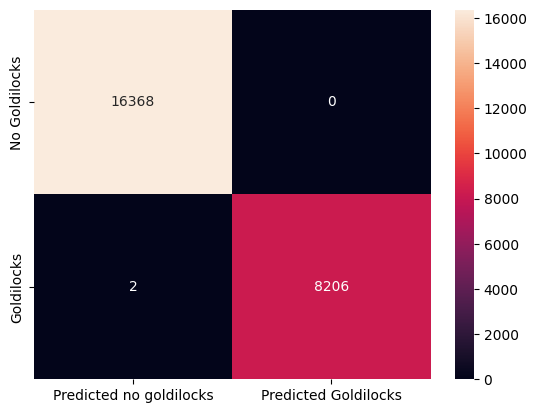

In [12]:
sns.heatmap(confusion,annot=True,fmt='g')

In [13]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16368
           1       1.00      1.00      1.00      8208

    accuracy                           1.00     24576
   macro avg       1.00      1.00      1.00     24576
weighted avg       1.00      1.00      1.00     24576



<AxesSubplot:>

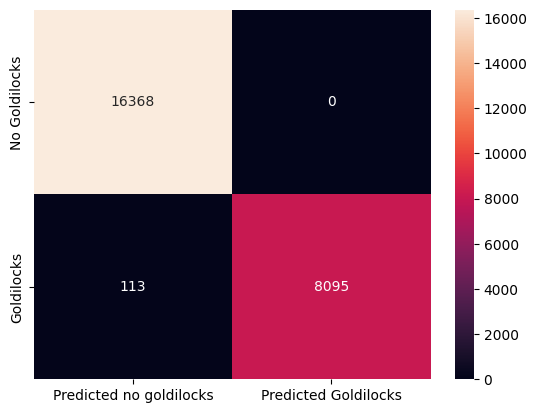

In [14]:
cm = np.array(confusion_matrix(y_test, y_predict1, labels=[0,1]))
confusion = pd.DataFrame(cm, index = ['No Goldilocks', 'Goldilocks'], columns=['Predicted no goldilocks', 'Predicted Goldilocks'])
sns.heatmap(confusion,annot=True,fmt='g')